## Observations and Insights 

In [ ]:
# Observations based on the data and tables below

# 1st Observation
# 2nd Observation
# 3rd Observation

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = len(combined_data["Mouse ID"].unique())
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_grp = combined_data.reset_index().groupby(["Mouse ID", "Timepoint"])[["index"]].count()
mice_grp

index
Mouse ID Timepoint       
a203     0              1
         5              1
         10             1
         15             1
         20             1
...                   ...
z969     25             1
         30             1
         35             1
         40             1
         45             1

[1888 rows x 1 columns]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouseid = mice_grp.loc[mice_grp["index"]>1]
duplicated_mouseid

index
Mouse ID Timepoint       
g989     0              2
         5              2
         10             2
         15             2
         20             2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.loc[combined_data["Mouse ID"]!= "g989"]
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count = len(cleaned_data["Mouse ID"].unique())
cleaned_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dv = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
agg_table = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
# Using the aggregation method, produce the same summary statistics in a single line
combined_data.groupby("Drug Regimen").agg(agg_table)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

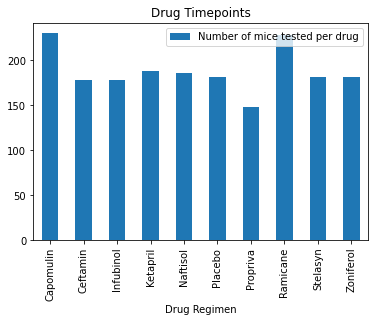

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_timepoints = pd.DataFrame(cleaned_data.groupby(["Drug Regimen"]).count()).reset_index()
drugs_time = drug_timepoints[["Drug Regimen", "Mouse ID"]]
drugs_time = drugs_time.rename(columns={"Mouse ID":"Number of mice tested per drug"})
drugs_time = drugs_time.set_index("Drug Regimen")

drugs_time.plot(kind="bar")
plt.title("Drug Timepoints")
plt.show()
plt.tight_layout()

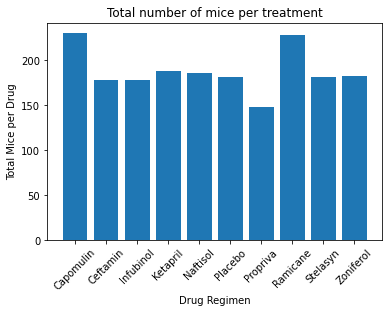

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs_per_mice = drug_timepoints[["Drug Regimen"]]
drugs_reg = drug_timepoints["Drug Regimen"].tolist()
x_axis = drugs_reg
plt.bar(x_axis, drugs_time["Number of mice tested per drug"], align="center")
plt.title("Total number of mice per treatment")
plt.xticks(rotation = 45)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice per Drug")
plt.show()
plt.tight_layout()

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_grp = (cleaned_data.groupby("Sex").count()).reset_index()
gender_grp = gender_grp[["Sex", "Mouse ID"]]
gender_grp

,Sex,Mouse ID
0,Female,922
1,Male,958


Text(0, 0.5, '')

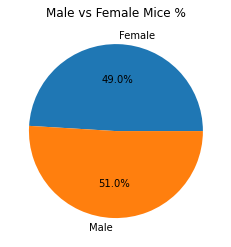

In [15]:
gender_grp.plot(kind="pie", y = "Mouse ID", autopct='%1.1f%%', legend=False, labels=gender_grp["Sex"])
plt.title("Male vs Female Mice %")
plt.xlabel("")
plt.ylabel("")

([<matplotlib.patches.Wedge at 0x252212e0550>,
 [Text(0.036089469908307935, 1.1994571897995099, 'Females'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Males')],
 [Text(0.02105219077984629, 0.6996833607163808, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

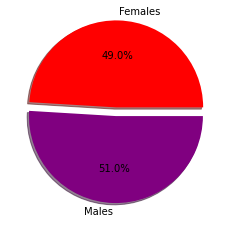

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot = (cleaned_data.groupby(["Sex"])["Mouse ID"].count()).tolist()

labels = ["Females", "Males"]
colors = ["red", "purple"]
explode = (0.1, 0)
plt.pie(gender_pyplot, explode=explode,colors=colors, labels=labels, autopct="%1.1f%%", shadow=True)

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = combined_data.groupby("Mouse ID")
last_tp = last_tp["Timepoint"].max()
fnl_tum_vol = pd.DataFrame(last_tp)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tum_vol = pd.merge(last_tp, combined_data, on = ["Mouse ID","Timepoint"])
tum_vol.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
fnl_tum_vol = pd.merge(last_tp, cleaned_data, on = ["Mouse ID", "Timepoint"])
fnl_tum_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tum_vol_cap = []
tum_vol_ram = []
tum_vol_inf = []
tum_vol_cef = []

for i in range(len(fnl_tum_vol)-1):
    if fnl_tum_vol.loc[i, "Drug Regimen"] == "Capomulin":
        tum_vol_cap.append(fnl_tum_vol.loc[i, "Tumor Volume (mm3)"])
    if fnl_tum_vol.loc[i, "Drug Regimen"] == "Ramicane":
        tum_vol_ram.append(fnl_tum_vol.loc[i, "Tumor Volume (mm3)"])
    if fnl_tum_vol.loc[i, "Drug Regimen"] == "Infubinol":
        tum_vol_inf.append(fnl_tum_vol.loc[i, "Tumor Volume (mm3)"])
    if fnl_tum_vol.loc[i, "Drug Regimen"] == "Ceftamin":
        tum_vol_cef.append(fnl_tum_vol.loc[i, "Tumor Volume (mm3)"])
        
tumor_vol = [tum_vol_cap, tum_vol_ram, tum_vol_inf, tum_vol_cef]
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
out_list = []
for i in range (len(tumor_vol)):
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    quartiles = pd.Series(tumor_vol[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{treatments[i]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}.")
    print(f"The upper quartile of tumor volume is: {upperq}.")
    print(f"The interquartile range of tumor volume is: {iqr}.")
    print(f"The median of tumor volume is: {quartiles[0.5]}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    for j in range(len(tumor_vol[i])):
        if (tumor_vol[i][j] < lower_bound) or (tumor_vol[i][j] > upper_bound):
            outlier = tumor_vol[i][j]
            out_list.append(outlier)
            print(f"The outliers are {out_list}.")


Capomulin:
The lower quartile of tumor volume is: 32.37735684.
The upper quartile of tumor volume is: 40.1592203.
The interquartile range of tumor volume is: 7.781863460000004.
The median of tumor volume is: 38.125164399999996.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56046955.
The upper quartile of tumor volume is: 40.65900627.
The interquartile range of tumor volume is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.04860769.
The upper quartile of tumor volume is: 65.52574285.
The interquartile range of tumor volume is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The outliers are [36.321345799999996

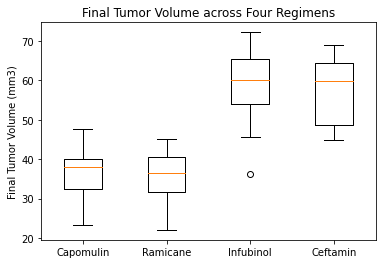

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol)
ax1.set_title("Final Tumor Volume across Four Regimens")
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tum_vol.loc[tum_vol["Drug Regimen"] == "Capomulin"]

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
81,i557,45,Capomulin,Female,1,24,47.685963,1
84,i738,45,Capomulin,Female,23,20,37.311846,2
86,j119,45,Capomulin,Female,7,23,38.125164,1
88,j246,35,Capomulin,Female,21,21,38.753265,1
109,l509,45,Capomulin,Male,17,21,41.483008,3


In [29]:
r944_data = combined_data.loc[combined_data["Mouse ID"]=="r944"]
r944_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
381,r944,Capomulin,Male,12,25,0,45.000000,0
382,r944,Capomulin,Male,12,25,5,45.737145,0
383,r944,Capomulin,Male,12,25,10,46.544292,0
384,r944,Capomulin,Male,12,25,15,47.373423,0
385,r944,Capomulin,Male,12,25,20,43.225671,1
386,r944,Capomulin,Male,12,25,25,41.086991,1
387,r944,Capomulin,Male,12,25,30,41.680791,1
388,r944,Capomulin,Male,12,25,35,40.401765,2
389,r944,Capomulin,Male,12,25,40,41.042045,2
390,r944,Capomulin,Male,12,25,45,41.581521,2


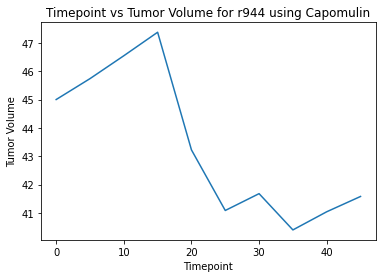

In [31]:
r944_tp = r944_data["Timepoint"]
r944_vol = r944_data["Tumor Volume (mm3)"]
plt.plot(r944_tp, r944_vol)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Timepoint vs Tumor Volume for r944 using Capomulin')
plt.show()

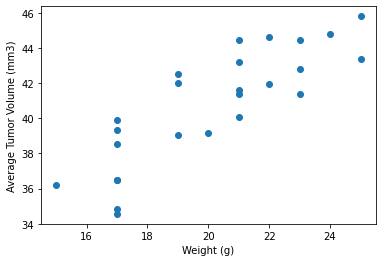

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_df = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avg_tum_cap = capo_df["Tumor Volume (mm3)"].mean()
mouse_weight = capo_df["Weight (g)"].unique()
plt.scatter(mouse_weight, avg_tum_cap)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


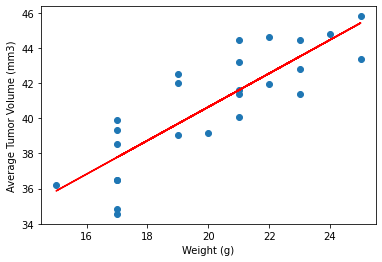

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, avg_tum_cap)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tum_cap)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tum_cap)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()